In [2]:
# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "alice.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
readme.alice.md                                2020-05-23 11:04:34          732
11.txt                                         2020-05-23 11:16:32       163810
alice.txt                                      2020-05-23 11:20:28       144446
alice.txt.conll                                2020-05-23 11:10:26       704716
alice.txt.json                                 2020-05-23 11:10:22     27920849
build_alice.sh                                 2020-05-23 11:07:04          599
Extracting all the files now...
Done!


In [3]:
# 30. Reading the result
morphemes = []

with open('alice.txt.conll') as f:
    for line in f:
        cols = line.split("\t")
        if (len(cols)>=4):
            morpheme = {
                'text': cols[1],
                'lemma': cols[2],
                'pos': cols[3]
            }
            morphemes.append(morpheme)
print(morphemes[:3])



[{'text': 'ALICE', 'lemma': 'ALICE', 'pos': 'NNP'}, {'text': "'S", 'lemma': "'s", 'pos': 'POS'}, {'text': 'ADVENTURES', 'lemma': 'ADVENTURES', 'pos': 'NNP'}]


In [4]:
# 31. Verbs
verbs = []

for morpheme in morphemes:
    if 'VB' in morpheme['pos']:
        verbs.append(morpheme)

verbs_surface_form = [verb['text'] for verb in verbs]
print(verbs_surface_form[:10])

['was', 'beginning', 'get', 'sitting', 'having', 'do', 'had', 'peeped', 'was', 'reading']


In [5]:
# 32. Base forms of verbs
verbs_lemma = [verb['lemma'] for verb in verbs]
print(verbs_lemma[:10])


['be', 'begin', 'get', 'sit', 'have', 'do', 'have', 'peep', 'be', 'read']


In [23]:
# 33. A of B

phrases = []

for i in range(2, len(morphemes)):
    if morphemes[i-2]['pos'] == morphemes[i]['pos'] == 'NN'\
        and morphemes[i-1]['text'] == 'of':
        phrase = " ".join(morpheme['text'] for morpheme in morphemes[i-2:i+1])
        phrases.append(phrase)
                       
print(phrases[:5])

['plenty of time', 'saucer of milk', 'sort of way', 'flavour of cherry-tart', 'number of bathing']


In [27]:
# 34. A B

longest_length_noun_phrase = ''
most_words_noun_phrase = []
tmp_longest = longest_length_noun_phrase
tmp_most = most_words_noun_phrase

for morpheme in morphemes:
    if 'NN' in morpheme['pos']:
        tmp_longest =  morpheme['text'] if tmp_longest == '' else tmp_longest + ' ' + morpheme['text']
        tmp_most.append(morpheme['text'])
    else:
        if len(tmp_longest) > len(longest_length_noun_phrase):
            longest_length_noun_phrase = tmp_longest
        if len(tmp_most) > len(most_words_noun_phrase):
            most_words_noun_phrase = tmp_most
        
        tmp_longest = ''
        tmp_most = []

print(longest_length_noun_phrase)
print(" ".join(most_words_noun_phrase))

MILLENNIUM FULCRUM EDITION
Ou est ma chatte


In [5]:
# 35. Frequency of words

from collections import Counter, OrderedDict

word_counter = Counter(morpheme['text'].lower() for morpheme in morphemes if morpheme['pos'].isalpha())
# sorted_words = sorted(word_counter, key=lambda x: x[1], reverse=True)
print(word_counter)

Counter({'the': 1639, 'and': 866, 'to': 725, 'a': 631, 'it': 595, 'she': 553, 'i': 544, 'of': 511, 'said': 462, 'you': 411, 'alice': 398, 'was': 368, 'in': 367, 'that': 315, 'as': 263, "n't": 217, 'at': 212, "'s": 201, 'on': 193, 'had': 186, 'all': 182, 'with': 181, 'but': 170, 'for': 153, 'they': 152, 'so': 151, 'be': 148, 'not': 146, 'very': 144, 'do': 142, 'what': 141, 'this': 134, 'little': 128, 'he': 125, 'is': 118, 'out': 113, 'one': 104, 'down': 102, 'there': 99, 'up': 98, 'would': 96, 'if': 96, 'then': 94, 'about': 94, 'no': 90, 'have': 88, 'them': 88, 'know': 87, 'could': 86, 'were': 86, 'like': 85, 'went': 83, 'again': 83, 'herself': 83, 'when': 79, 'or': 77, 'did': 77, 'queen': 75, 'thought': 74, 'off': 73, 'time': 68, 'how': 68, 'me': 68, 'into': 67, 'see': 67, 'who': 63, 'king': 63, 'well': 60, 'now': 60, '*': 60, "'m": 59, 'turtle': 59, 'began': 58, 'by': 57, "'ll": 57, 'an': 57, 'hatter': 56, 'mock': 56, 'quite': 55, 'gryphon': 55, 'are': 54, 'think': 53, 'way': 53, 'jus

In [11]:
!pip install matplotlib


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.9 -m pip install --upgrade pip


[('the', 1639), ('and', 866), ('to', 725), ('a', 631), ('it', 595), ('she', 553), ('i', 544), ('of', 511), ('said', 462), ('you', 411)]


Text(0.5, 1.0, '10 most frequent words')

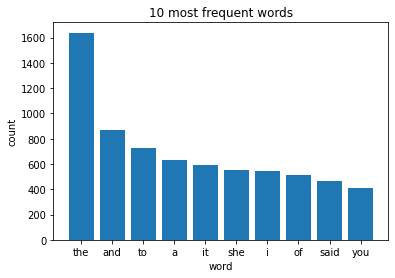

In [7]:
# 36. Top-ten frequent words

import matplotlib.pyplot as plt

top_ten_list = word_counter.most_common(10)
print(top_ten_list)
words = [item[0] for item in top_ten_list]
counts = [item[1] for item in top_ten_list]

plt.bar(range(10), counts)
plt.xticks(range(10),words)
plt.xlabel('word')
plt.ylabel('count')
plt.title('10 most frequent words')

Text(0.5, 1.0, '10 most frequent words co-occur with "Alice"')

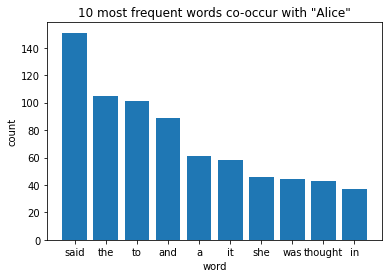

In [32]:
# 37. Top-ten words co-occurring with 'Alice'

co_occur_list = Counter()
window_size = 5

for i, morpheme in enumerate(morphemes):
    if morpheme['text'].lower() == 'alice':
        for j in range(i-window_size, i+window_size+1):
            if j in range(0, len(morphemes)) and j != i and morphemes[j]['pos'].isalpha():
                co_occur_list.update([morphemes[j]['text'].lower()])

top_ten_list = co_occur_list.most_common(10)
words = [item[0] for item in top_ten_list]
counts = [item[1] for item in top_ten_list]

plt.bar(range(10), counts)
plt.xticks(range(10),words)
plt.xlabel('word')
plt.ylabel('count')
plt.title('10 most frequent words co-occur with "Alice"')

Text(0.5, 1.0, 'Word frequency histogram')

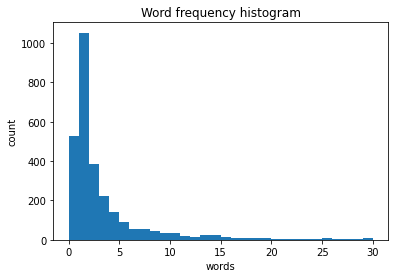

In [17]:
# 38. Histogram 

words = set(morpheme['text'] for morpheme in morphemes if morpheme['pos'].isalpha())
counts = [word_counter[word] for word in words]

plt.hist(counts, bins=30, range=(0,30))
plt.xlabel('words')
plt.ylabel('count')

# plt.ylim(max(word_counter.values()))
plt.title('Word frequency histogram')


Text(0.5, 1.0, 'Word frequency histogram')

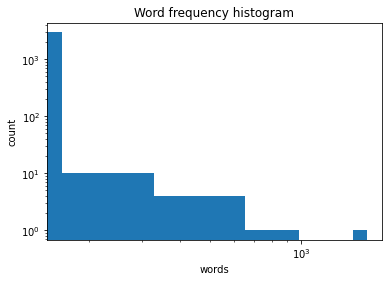

In [18]:
# 39. Zipf's law 

words = set(morpheme['text'] for morpheme in morphemes if morpheme['pos'].isalpha())
counts = [word_counter[word] for word in words]

plt.hist(counts)
plt.xlabel('words')
plt.ylabel('count')
plt.xscale('log')
plt.yscale('log')
# plt.ylim(max(word_counter.values()))
plt.title('Word frequency histogram')